# Support Vector Machine for Job Description to Occupation Code Classification

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks, though it is mostly popular for classification. The core idea of SVM is to find the best separating hyperplane that maximizes the margin between different classes in the dataset. The margin is the distance between the hyperplane and the nearest data points from each class; these closest points are called support vectors, hence the name of the algorithm.

**The Kernel Trick**

SVM works well for linearly separable data. However, many datasets are not linearly separable. The kernel trick enables SVM to perform non-linear classification by implicitly mapping input features into a higher-dimensional space where a linear separator can exist.

### Import Required Libraries

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split  
from sklearn.svm import LinearSVC  
from sklearn.metrics import classification_report  
pd.set_option('display.max_columns', None)

### Load the ESCO Occupation Dataset

In [15]:
df = pd.read_csv('C:/Users/hp/Desktop/Machine Learning/Datasets/ESCO dataset - v1.2.0 - classification - en - csv/occupations_en.csv')

# View structure
print("Initial shape:", df.shape)
df = df[['conceptUri', 'preferredLabel', 'altLabels', 'definition', 'description']].dropna(subset=['conceptUri', 'preferredLabel'])
# Ensure at least these two exist
print("After dropping nulls:", df.shape)

Initial shape: (3039, 14)
After dropping nulls: (3039, 5)


In [16]:
print(df.columns.tolist())

['conceptUri', 'preferredLabel', 'altLabels', 'definition', 'description']


### Exploratory Data Analysis (EDA)

Unique ESCO codes: 3039

Sample job titles:
preferredLabel
technical director                                                             1
wholesale merchant in hardware, plumbing and heating equipment and supplies    1
moving truck driver                                                            1
terrazzo setter                                                                1
heat treatment furnace operator                                                1
building information modelling consultant                                      1
metal planer operator                                                          1
rental service representative in recreational and sports goods                 1
specialist dentist                                                             1
aquaculture husbandry manager                                                  1
Name: count, dtype: int64


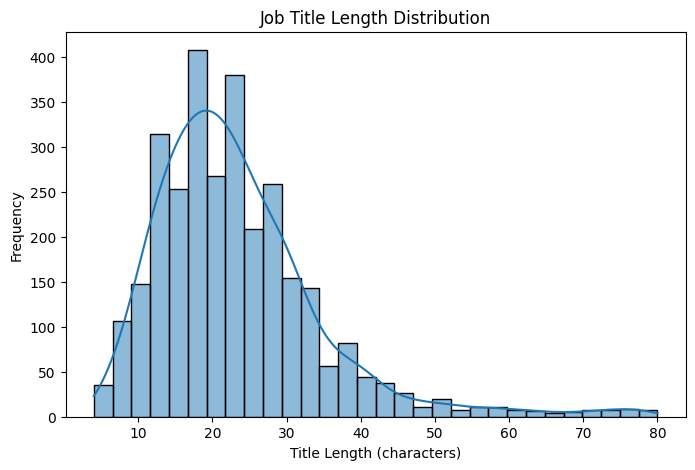

In [17]:
# Check number of unique occupation codes
print("Unique ESCO codes:", df['conceptUri'].nunique())

# Check sample records
print("\nSample job titles:")
print(df['preferredLabel'].value_counts().head(10))

# Distribution of job title lengths
df['title_length'] = df['preferredLabel'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 5))
sns.histplot(df['title_length'], bins=30, kde=True)
plt.title("Job Title Length Distribution")
plt.xlabel("Title Length (characters)")
plt.ylabel("Frequency")
plt.show()

### Preprocess Text for Classification

In [18]:
# Combine multiple text fields into one for richer descriptions
df['job_text'] = df['preferredLabel'].fillna('') + ' ' + \
                 df['altLabels'].fillna('') + ' ' + \
                 df['definition'].fillna('') + ' ' + \
                 df['description'].fillna('')

# Drop unused and duplicate rows
df = df[['conceptUri', 'job_text']].drop_duplicates().reset_index(drop=True)
df.columns = ['esco_code', 'job_text']

# Preview
print(df.head(3))

                                           esco_code   
0  http://data.europa.eu/esco/occupation/00030d09...  \
1  http://data.europa.eu/esco/occupation/000e93a3...   
2  http://data.europa.eu/esco/occupation/0019b951...   

                                            job_text  
0  technical director technical and operations di...  
1  metal drawing machine operator metal drawing m...  
2  precision device inspector inspector of precis...  


### Text Vectorization with TF-IDF

In [19]:
# Convert job text into numeric vectors
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, stop_words='english')
X = vectorizer.fit_transform(df['job_text'])
print("Vectorized shape:", X.shape)

Vectorized shape: (3039, 10000)


### Encode Target Labels (ESCO Codes)

In [20]:
le = LabelEncoder()
y = le.fit_transform(df['esco_code'])
print("Number of classes:", len(le.classes_))

Number of classes: 3039


### Train-Test Split and Train the Model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearSVC()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [26]:
import numpy as np
from collections import Counter

# Step 1: Find top 50 labels from full y_test
top_labels = [label for label, _ in Counter(y_test).most_common(50)]

# Step 2: Create mask for y_test entries that belong to top 50
mask = np.isin(y_test, top_labels)

# Step 3: Subset the test data
y_test_top = y_test[mask]
y_pred_top = y_pred[mask]

# Step 4: Get actual class labels after masking (may be less or more than 50)
unique_labels = np.unique(y_test_top)
target_names = le.inverse_transform(unique_labels)

# Step 5: Print report
print(classification_report(y_test_top, y_pred_top, labels=unique_labels, target_names=target_names))

                                                                            precision    recall  f1-score   support

http://data.europa.eu/esco/occupation/02eb0ae6-ecdd-4602-9c8e-60ffe6dbe1e2       0.00      0.00      0.00       1.0
http://data.europa.eu/esco/occupation/0368c4d4-94cf-4168-a84d-283a25880e0d       0.00      0.00      0.00       1.0
http://data.europa.eu/esco/occupation/0464b062-cea6-4164-b10d-956c61956ae7       0.00      0.00      0.00       1.0
http://data.europa.eu/esco/occupation/0ab77768-9031-4ccc-9ab8-1f73cbb36bc7       0.00      0.00      0.00       1.0
http://data.europa.eu/esco/occupation/0da75680-fbf9-44d8-802a-ac12eb425a34       0.00      0.00      0.00       1.0
http://data.europa.eu/esco/occupation/0ededdc2-050a-4ec3-8e70-6295105fcd19       0.00      0.00      0.00       1.0
http://data.europa.eu/esco/occupation/158965f1-bd83-441c-bca8-1975b74dedc5       0.00      0.00      0.00       1.0
http://data.europa.eu/esco/occupation/17e39591-7137-4960-94c8-8169f7a5d

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetric

### Predict for New Input

In [27]:
def predict_job_code(job_text):
    features = vectorizer.transform([job_text])
    predicted_label = model.predict(features)
    return le.inverse_transform(predicted_label)[0]

# Try a sample prediction
sample_input = "installs and maintains industrial cooling systems"
print(f"\nPrediction for '{sample_input}':")
print(predict_job_code(sample_input))


Prediction for 'installs and maintains industrial cooling systems':
http://data.europa.eu/esco/occupation/53d2052f-edc0-4f44-8be1-164526412bfe
